$$
\begin{array}{c}
f(x) = x_1^2 + x_2^2 + x_3^2 + x_4^2 + x_5^2 + x_6^2 \\\
x_i = [-20; 20]
\end{array}
$$

Use Genetic Algorithm to find min value of f(x)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_random_value():
    return random.uniform(-20.0, 20.0)

def generate_data(n):
    return [generate_random_value() for _ in range(n)]

def generate_datas(n, m):
    return [generate_data(n) for _ in range(m)]

def cal_loss(data):
    s = sum(d*d for d in data)
    return s

def cal_fitness(data):
    loss = cal_loss(data)
    return 1/(loss+1)


In [3]:
def selection(items):    
    while True:
        idx1 = random.randint(0, len(items)-1)
        idx2 = random.randint(0, len(items)-1)
        
        if (idx1 > idx2):
            return items[idx1]
        elif (idx1 < idx2):
            return items[idx2]
        

def scrossover(item1, item2, rate = 0.9):
    i1 = item1.copy()
    i2 = item2.copy()
    
    for i in range(len(i1)):
        if (random.random() < rate):
            i1[i], i2[i] = i2[i], i1[i]
    
    return i1, i2
            
            
def mutate(data, mutation_rate = 0.05):
    for i in range(len(data)):
        if random.random() < mutation_rate:
            data[i] = generate_random_value()
            
    return data


[0.08327658793531256, 0.03805213970011678, -0.15097905543111878, -0.06569409891380928, -0.09309400863224937, 0.0397360864768217]
0.045738796256590025


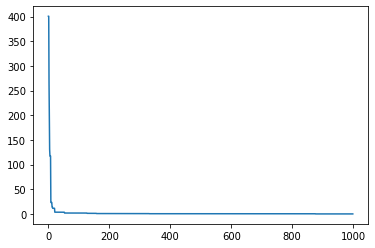

In [4]:
fitnesses = []

def create_new_data(old_data, m, buffer=2):
    sorted_old_data = sorted(old_data, key=cal_fitness)
    
    curr_fitness = cal_loss(sorted_old_data[-1])
    fitnesses.append(curr_fitness)
    
    new_datas = []
    while (len(new_datas) < m-buffer):
        
        good_data_1 = selection(sorted_old_data)
        good_data_2 = selection(sorted_old_data)
    
        good_data_1, good_data_2 = scrossover(good_data_1, good_data_2)
    
        good_data_1 = mutate(good_data_1)
        good_data_2 = mutate(good_data_2)
        
        new_datas.append(good_data_1)
        new_datas.append(good_data_2)
        
    for data in sorted_old_data[m-buffer:]:
        new_datas.append(data.copy())
    
    return new_datas


n = 6
m  = 10
n_generation = 1000
items = generate_datas(n, m)

for _ in range(n_generation):
    items = create_new_data(items, m, 2)


X = np.arange(0, n_generation, 1)
plt.plot(X, fitnesses)

print(items[-1])
print(fitnesses[-1])